# Thống kê máy tính và ứng dụng (Computational Statistics and Applications)

## Thông tin sinh viên :
- **Họ và tên :** Trình Cao An  
- **MSSV:** 22127004  

## Các thư viện cần thiết

In [53]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import pymc as pm
import arviz as az
import pytensor.tensor as pt
from scipy.stats import beta
import pandas as pd
from statistics import median, stdev
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## Câu 1

### Phần 1

#### Câu a:

Ta có:
$$
T_1 = 2 \bar{X} = \frac{2}{n}\sum^n_{i = 1}X_i
$$

In [54]:
# Dữ liệu quan sát
X = np.array([
    1.11, 0.00, 0.47, 0.23, 0.14, 0.29, 0.53, 0.61,
    0.83, 0.65, 1.05, 0.31, 1.35, 0.04, 1.03, 0.64,
    0.86, 0.22, 0.30, 1.23, 1.49, 0.48, 1.07, 1.35
])

In [55]:
X_bar = np.mean(X)
T1 = 2 * X_bar
print(f"T1 = 2·X̄ = {T1:.4f}")

T1 = 2·X̄ = 1.3567


Ta có:
$$
\hat{m} = \frac{0.61 + 0.64}{2} = 0.625
$$
và $T_2 = 2\hat{m}$

In [56]:
m_hat = (np.quantile(X, 0.5))
T2 = 2 * m_hat
print(f"T2 = 2·m̂ = {T2:.4f}")

T2 = 2·m̂ = 1.2500


Ta có :
$$
T_3 = 2\sqrt{3}S
$$

In [57]:
S = stdev(X)
T3 = 2 * np.sqrt(3) * S
print(f"T3 = {T3:.4f}")

T3 = 1.5547


Ta có:
$$
T_4 = \max{\{X_i\}}
$$

In [58]:
T4 = np.max(X)
print(f"T4 = {T4:.4f}")

T4 = 1.4900


#### Câu b:

Các bước cụ thể:
1. Chọn số lần lặp $N$
2. Khởi tạo các mảng để lưu $T_k^{*(b)}$ cho $k = 1, 2, 3, 4$
3. Lặp $N$ lần:
  - Chọn ngẫu nhiên 24 giá trị có hoàn lại từ $X$ ban đầu
  - Tính thống kê $\bar{X}^{*(b)}, \hat{m}^{*(b)}, \max{X}^{*(b)}$
  - Tính các giá trị $T_1, T_2, T_3, T_4$ và lưu lại
4. Thống kê và tính độ lệch chuẩn của từng dãy $\{T_k^{*(b)}\}_{n = 1}^N$

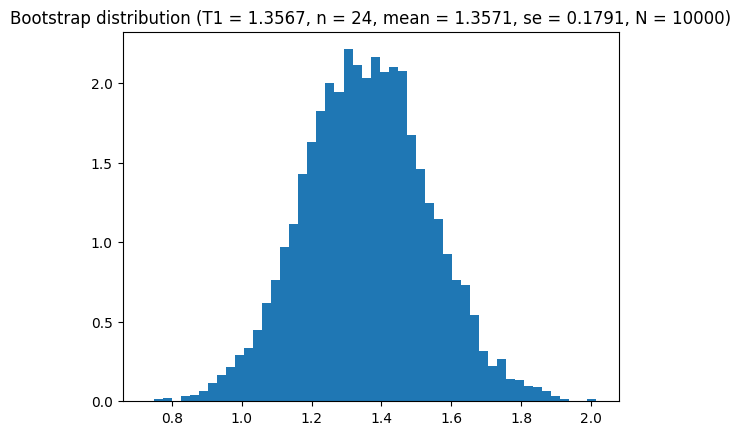

In [59]:
n = len(X)
B = 10000  # số lần bootstrap

T1_boot = [2 * np.mean(np.random.choice(X, size=n, replace=True))for _ in range(B)]
plt.hist(T1_boot, bins=50, density=True)
plt.title(f"Bootstrap distribution (T1 = {T1:.4f}, n = {n}, "
          f"mean = {np.mean(T1_boot):.4f}, se = {np.std(T1_boot):.4f}, N = {B})")
plt.show()


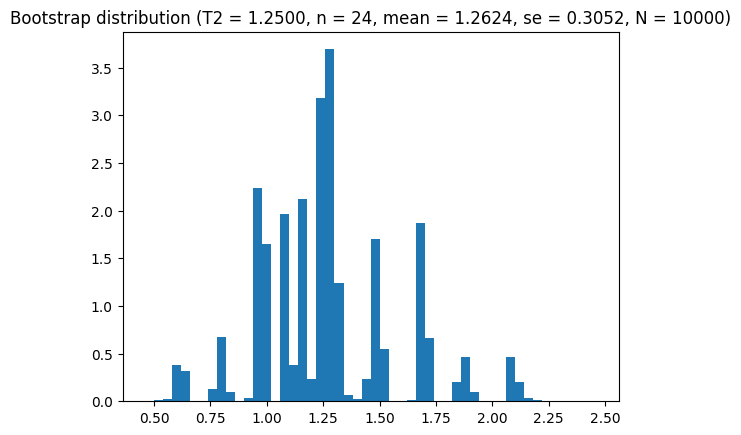

In [60]:
# --- T2: 2 * median(X*) ---
T2_boot = [
    2 * np.median(np.random.choice(X, size=n, replace=True))
    for _ in range(B)
]
plt.hist(T2_boot, bins=50, density=True)
plt.title(
    f"Bootstrap distribution (T2 = {T2:.4f}, n = {n}, "
    f"mean = {np.mean(T2_boot):.4f}, se = {np.std(T2_boot, ddof=1):.4f}, N = {B})"
)
plt.show()


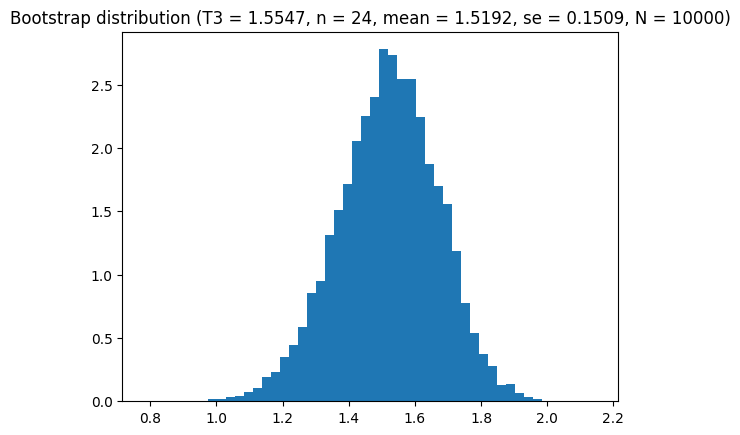

In [61]:
# --- T3: 2 * sqrt(3) * S(X*) ---
T3_boot = [
    2 * np.sqrt(3) * np.std(np.random.choice(X, size=n, replace=True), ddof=1)
    for _ in range(B)
]
plt.hist(T3_boot, bins=50, density=True)
plt.title(
    f"Bootstrap distribution (T3 = {T3:.4f}, n = {n}, "
    f"mean = {np.mean(T3_boot):.4f}, se = {np.std(T3_boot, ddof=1):.4f}, N = {B})"
)
plt.show()


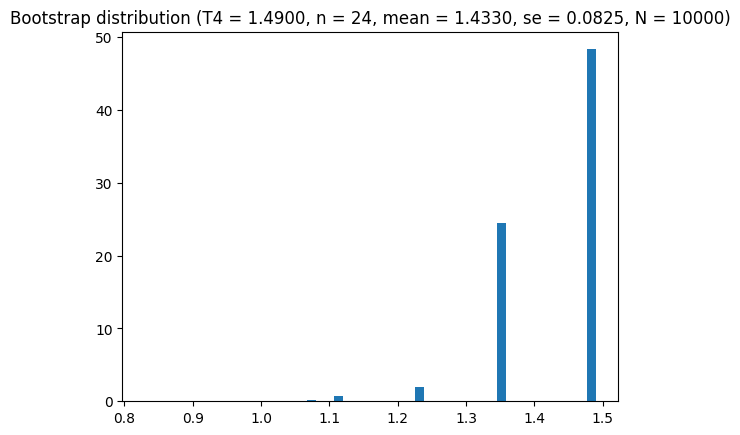

In [62]:
# --- T4: max(X*) ---
T4_boot = [
    np.max(np.random.choice(X, size=n, replace=True))
    for _ in range(B)
]
plt.hist(T4_boot, bins=50, density=True)
plt.title(
    f"Bootstrap distribution (T4 = {T4:.4f}, n = {n}, "
    f"mean = {np.mean(T4_boot):.4f}, se = {np.std(T4_boot, ddof=1):.4f}, N = {B})"
)
plt.show()

#### Câu c:

Ta có:  
Prior:
$$
e ∼ \text{Exp}(1), θ = 1 + e, \space \text{và } θ \leq 2
$$
Likelihood:
$$
X_i | θ = U(0, θ), θ \geq \max_iX_i
$$
Suy ra Posterior:
$$
p(\theta|X) ∝ e^{(θ - 1)} θ^{-n} \text{ trên }[\max{X}, 2]
$$

Output()

ERROR:pymc.stats.convergence:There were 3091 divergences after tuning. Increase `target_accept` or reparameterize.


         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
theta  1.5515  0.0654    1.49   1.6645      0.003   0.0034  442.5708   

       ess_tail   r_hat  
theta  785.7287  1.0025  

Posterior mean (Bayes‐estimate) = 1.5515
Posterior SD                    = 0.0654


<Axes: title={'center': 'theta'}>

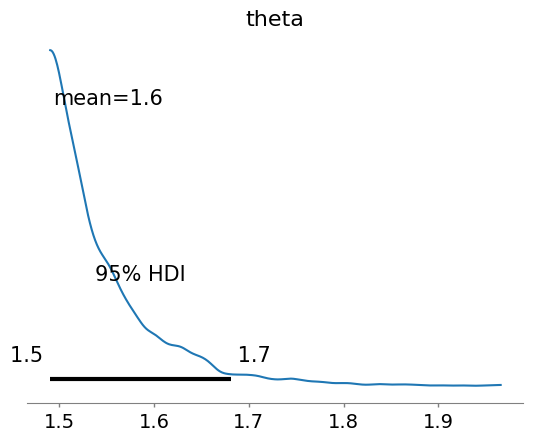

In [63]:

x_max = X.max()

# ——— 2. Mô hình Bayes trong PyMC ———
with pm.Model() as model:
    # 2.1) e ~ Exp(1) → θ = 1 + e
    e = pm.Exponential("e", lam=1.0)
    theta = pm.Deterministic("theta", 1 + e)

    # 2.2) Ràng buộc θ ≤ 2
    pm.Potential("bound", pm.math.switch(theta <= 2, 0, -np.inf))

    # 2.3) Likelihood: X_i ~ Uniform(0, θ)
    pm.Uniform("X_obs", lower=0.0, upper=theta, observed=X)

    # 3) Lấy mẫu hậu nghiệm
    trace = pm.sample(
        draws=3000,
        tune=1500,
        target_accept=0.9,
        return_inferencedata=True,
        random_seed=42
    )

# ——— 4. Tóm tắt kết quả ———
summary = az.summary(trace, var_names=["theta"], round_to=4)
theta_mean = summary.loc["theta", "mean"]
theta_sd   = summary.loc["theta", "sd"]

print(summary)
print(f"\nPosterior mean (Bayes‐estimate) = {theta_mean:.4f}")
print(f"Posterior SD                    = {theta_sd:.4f}")

# ——— 5. (Tuỳ chọn) Vẽ phân phối hậu nghiệm ———
az.plot_posterior(trace, var_names=["theta"], hdi_prob=0.95)


**So sánh**

In [64]:
# 6) So sánh vào DataFrame
se_T1 = np.std(T1_boot, ddof=1)
se_T2 = np.std(T2_boot, ddof=1)
se_T3 = np.std(T3_boot, ddof=1)
se_T4 = np.std(T4_boot, ddof=1)
df_compare = pd.DataFrame({
    "Estimator": ["T1 = 2·mean", "T2 = 2·median", "T3 = 2√3·std", "T4 = max", "Bayes θ"],
    "Mean":     [T1, T2, T3, T4, theta_mean],
    "SE":       [se_T1, se_T2, se_T3, se_T4, theta_sd]
})

df_compare

,Estimator,Mean,SE
0,T1 = 2·mean,1.356667,0.179065
1,T2 = 2·median,1.250000,0.305153
2,T3 = 2√3·std,1.554696,0.150873
3,T4 = max,1.490000,0.082485
4,Bayes θ,1.551500,0.065400


**Nhận xét :**
1. Sai số chuẩn (SE) thấp nhất là Bayes θ (0.065), tiếp theo là T4 = max (0.084).
  - Điều này cho thấy khi có thêm thông tin tiên nghiệm $(Exp(1), θ \leq 2)$, ước lượng Bayes dao động rất ít quanh giá trị trung bình hậu nghiệm.
  - ước lượng $\max{X}$ cũng ít dao động vì nó luôn bám sát giá trị lớn nhất quan sát được, nhưng lại thường lệch âm (thường nhỏ hơn $θ$ thật).
2. $T_3 = 2\sqrt{3}S$ có $SE$ cỡ 0.15, thấp hơn một chút so với $T_1 = 2 \bar{X}(0.18)$
  - Ở mẫu này, dùng độ lệch chuẩn nhân hệ số $2\sqrt{3}$ hơi mạnh tay nên ước lượng hơi lớn $≈ 1.55$ và cũng ổn định hơn $2\bar{X}$
3. $T_1 = 2 \bar{X}$ có $SE ≈ 0.18$, là ước lượng không chệch cho $θ$ (với $U(0, θ)$ thì $E[2\bar{X}] = θ$) nhưng biến động tương đối lớn.
4. $T_2 = 2\hat{m}$ có $SE$ cao nhất $≈0.3$.

### Phần 2:

#### Câu d:

Sử dụng hàm `np.corrcoef` để tính hệ số tương quan

In [65]:
Y = np.array([2.38,1.03,1.00,0.90,0.93,0.90,1.06,1.16,1.57,1.22,2.18,0.91,
              3.32,0.99,2.12,1.21,1.65,0.90,0.91,2.82,3.98,1.01,2.25,3.32])
r = np.corrcoef(X, Y)[0, 1]
print(f"Hệ số tương quan mẫu r = {r:.4f}")

Hệ số tương quan mẫu r = 0.9260


#### Câu e:

1. Giả thuyết
 - $H_0 : ρ = 0$ (không tương quan)
 - $H_1 : ρ \neq 0$ (có tương quan)  
2.Ta chọn mức ý nghĩa $α = 0.05$ nếu p-value $< α$ thì bác bỏ $H_0$.

In [66]:
r_value, p_value = pearsonr(X, Y)

print(f"Hệ số tương quan Pearson r = {r_value:.4f}")
print(f"p-value = {p_value:.4g}")

# Kết luận
alpha = 0.05
if p_value < alpha:
    print(f"p-value < {alpha} → bác bỏ H0: có bằng chứng thống kê cho thấy X và Y có tương quan.")
else:
    print(f"p-value ≥ {alpha} → không đủ chứng cứ để bác bỏ H0: chưa có bằng chứng tương quan.")

Hệ số tương quan Pearson r = 0.9260
p-value = 8.828e-11
p-value < 0.05 → bác bỏ H0: có bằng chứng thống kê cho thấy X và Y có tương quan.


#### Câu f:

**Ý tưởng:**
- Ta tính hệ số tương quan mẫu $r_{obs}$ giữa $X, Y$
- Giả thuyết $H_0 :$ "Không có sự tương quan" (tức là mọi liên kết)giữa $X, Y$ chỉ là ngẫu nhiên.
- Permutation test dùng ý tưởng: nếu thật sự không có tương quan, thì ta có thể “xáo trộn” trật tự của $Y$ mà không làm thay đổi phân phối chung, và mọi hoán vị như nhau.
**Cách làm:**
1. Tính $r_{obs}$
2. Lặp lại $N$ lần:
  - Tạo 1 bản sao hoán vị của $Y$.
  - Tính $r^{*}_i = corr(X, Y)$.
3. Tập hợp $\{r^*_1, r^*_2, \cdots, r^*_n\}$ là phân phối giả của $r$ dưới $H_0$.
4. P-value được ước lượng như sau:
$$
  p = \frac{1}{N}\sum_{i = 1}^N1(|r^*_i|\geq|r_{obs}|)
$$
5. So sánh với mức ý nghĩa $α$


In [67]:

def rand_perm(x, y):
    """Xáo trộn y, tính tương quan mới sau khi hoán vị"""
    y_perm = np.random.permutation(y)
    return np.corrcoef(x, y_perm)[0, 1]

N = 100000
samples = np.fromiter((rand_perm(X, Y) for _ in range(N)), dtype=float)

# 5. P-value
p_perm = np.mean(np.abs(samples) >= abs(r))

# 6. Kết quả
print(f"r thực tế       = {r:.4f}")
print(f"P-value (hoán vị) = {p_perm}")
if p_perm < alpha:
    print(f"p-value < {alpha} → bác bỏ H0: có bằng chứng thống kê cho thấy X và Y có tương quan.")
else:
    print(f"p-value ≥ {alpha} → không đủ chứng cứ để bác bỏ H0: chưa có bằng chứng tương quan.")

r thực tế       = 0.9260
P-value (hoán vị) = 0.0
p-value < 0.05 → bác bỏ H0: có bằng chứng thống kê cho thấy X và Y có tương quan.


**Kết luận :**
Như vậy ta cũng thấy $p < α$ cho nên "bác bỏ giả thuyết $X, Y$ không có tương quan".  
**So sánh với câu e:**
- Câu e dùng công thức lý thuyết (Pearson), giả định $X, Y$ bậc tự do và phân phối gần chuẩn để cho p‑value.
- Câu f dùng hóa trị dữ liệu qua hoán vị, không cần giả định phân phối, chỉ dựa trên tính hoán vị dưới $H_0$.

### Phần 3:

#### Câu g:

Ta có:
$$
Y = a + bx + cx^2 + ϵ
$$
Ta viết $X, Y$ lại dưới dạng ma trận:
$$
X = \begin{pmatrix}
1 && x_1 && x_1^2 \\
1 && x_2 && x_2^2 \\
\vdots && \vdots && \vdots \\
1 && x_n && x_n^2
\end{pmatrix},
Y = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$
Theo phương pháp bình phương tối thiểu bộ $(a, b, c)$ tốt nhất là:
$$
\begin{pmatrix}
a \\
b \\
c \\
\end{pmatrix} = (X^TX)^{-1}X^T Y
$$

In [68]:
X_matrix = np.vstack([np.ones_like(X), X, X**2]).T
a, b, c = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y
print("Ước lượng a =", a)
print("Ước lượng b =", b)
print("Ước lượng c =", c)

Ước lượng a = 1.0276873197237892
Ước lượng b = -1.0018047731332365
Ước lượng c = 2.00082202304402


In [69]:
def y_hat(w_hat, x):
    X_matrix = np.vstack([np.ones_like(x), x, x**2]).T
    return X_matrix @ w_hat

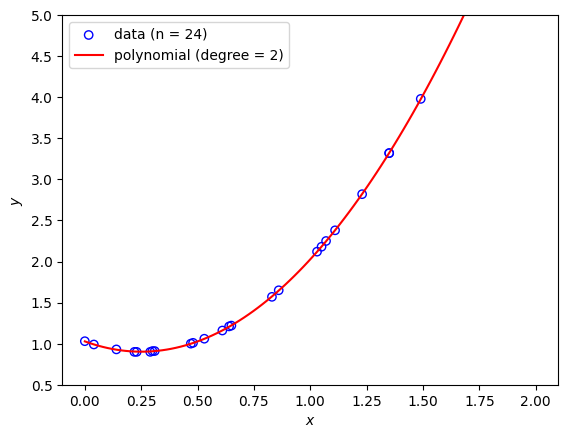

In [70]:
plt.scatter(X, Y, facecolors="none", edgecolors="blue", label=f"data (n = {n})")
t = np.linspace(0, 2, 100)
plt.plot(t, y_hat([a, b, c], t), color="red", label=f"polynomial (degree = {2})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(0.5, 5)
plt.legend()
plt.show()

#### Câu h:

In [71]:
#Hàm ước lượng a,b,c
def fit_coef(Xd, Y):
    # dùng lstsq cho nhanh
    return np.linalg.lstsq(Xd, Y, rcond=None)[0]

In [72]:
N = 10000
boots = np.zeros((N, 3))
for i in range(N) :
  idx = np.random.choice(n, size=n, replace=True)  # chỉ số rút có trả lại
  Xb = X_matrix[idx]
  Yb = Y[idx]
  boots[i] = fit_coef(Xb, Yb)

lower = np.percentile(boots, 2.5, axis=0)
upper = np.percentile(boots, 97.5, axis=0)

print("Khoảng tin cậy 95% cho a:", "[",lower[0], ",", upper[0], "]")
print("Khoảng tin cậy 95% cho b:", "[",lower[1], ",", upper[1], "]")
print("Khoảng tin cậy 95% cho c:", "[",lower[2], ",", upper[2], "]")


Khoảng tin cậy 95% cho a: [ 1.0230935343611116 , 1.0304692291608255 ]
Khoảng tin cậy 95% cho b: [ -1.010545884740576 , -0.9877982055695482 ]
Khoảng tin cậy 95% cho c: [ 1.9917287831228023 , 2.0065005971031815 ]


#### Câu i:

Ta có mô hình:
$$
\hat{Y} = a + bx + cx^2
$$
Tại điểm $x_0 = 0.5$ ta dự đoán giá trị trung bình là:
$$
\hat{y_0} = a + 0.5b + 0.5^2c
$$
Nhưng vì dữ liệu có sai số nên sử dụng bootstrap để ước lượng khoảng tin cậy cho $\hat{y_0}$.

Dự đoán tại x0 = 0.5: y0_hat = 1.027
Sai số chuẩn của y0: SE = 0.001
Khoảng tin cậy 95% cho y0: [1.025, 1.029]


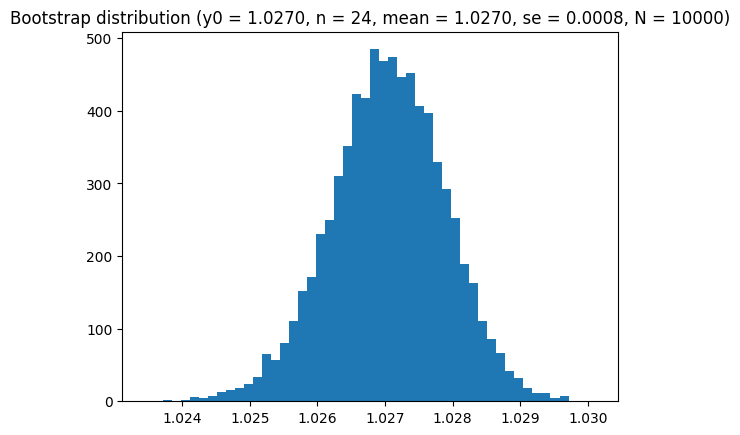

In [73]:
x0 = 0.5
y0_hat = a + b*x0 + x0**2*c
N = 10000
y0_boot = np.zeros(N)
for i in range (N) :
  idx = np.random.choice(n, size=n, replace=True)
  Xb = X_matrix[idx]
  Yb = Y[idx]
  a_b, b_b, c_b = fit_coef(Xb, Yb)
  y0_boot[i] = a_b + b_b*x0 + c_b*x0**2
se_y0 = np.std(y0_boot, ddof=1)
ci_lower, ci_upper = np.percentile(y0_boot, [2.5, 97.5])

print(f"Dự đoán tại x0 = {x0}: y0_hat = {y0_hat:.3f}")
print(f"Sai số chuẩn của y0: SE = {se_y0:.3f}")
print(f"Khoảng tin cậy 95% cho y0: [{ci_lower:.3f}, {ci_upper:.3f}]")
plt.hist(y0_boot, bins=50, density=True)
plt.title(
    f"Bootstrap distribution (y0 = {y0_hat:.4f}, n = {n}, "
    f"mean = {np.mean(y0_boot):.4f}, se = {se_y0:.4f}, N = {N})"
)
plt.show()

## Câu 2:

### Tiền xử lý dữ liệu

In [74]:
df = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Loại bỏ cột Date**

In [75]:
df = df.drop(columns=['Date'])
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Xử lý các cột không phải số**
Với cột Season ta sẽ tách ra thành 4 cột để tính hệ số tương quan cho chuẩn.

In [76]:
df['Holiday'] = df['Holiday'].map({
    'No Holiday': 0,
    'Holiday':    1
})

df['Functioning Day'] = df['Functioning Day'].map({
    'No':  0,
    'Yes': 1
})
# Tạo các cột dummy
dummies = pd.get_dummies(df['Seasons'], prefix='Season')

# Nối vào df
df = pd.concat([df, dummies], axis=1)

# Xóa cột gốc
df.drop(columns=['Seasons'], inplace=True)


In [77]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,False,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,False,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,False,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,False,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,False,False,False,True


### Câu a:

Tính hệ số tương quan của các thuộc tính với thuộc tính `Rented Bike Count` và lấy 2 thuộc tính có tương quan lớn nhất thì 2 thuộc tính đó có ảnh hướng lớn nhất tới thuộc tính `Rented Bike Count`

In [78]:
# Tính ma trận tương quan
corr = df.corr()['Rented Bike Count'].abs().sort_values(ascending=False)

print(corr.head(5))

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Season_Winter                0.424925
Hour                         0.410257
Dew point temperature(°C)    0.379788
Name: Rented Bike Count, dtype: float64


Như vậy nếu chỉ dùng 2 biến để dự đoán `Rented Bike Count` thì đầu tiên chúng ta sẽ chọn thuộc tính `Temperature(°C)` vì nó có hệ số tương quan cao nhất. Nhưng để chọn thuộc tính thứ 2 chúng ta thấy hệ số tương quan của 2 thuộc tính `Season_Winter` và `Hour` rất gần nhau. Vậy nên chúng ta phải xét thêm thuộc tính nào sẽ cho ta nhiều thông tin hơn. Ta đánh giá bằng chủ quan thì cũng có thể thấy thuộc tính `Hour` sẽ cho ta nhiều thông tin hơn bởi vì thuộc tính `Season_Winter` cũng sẽ chỉ cho ta thông tin là đang có phải ở mùa đông hay không ? Nhưng ta có thể dự đoán nó bằng thuộc tính `Temperature(°C)` vì nếu nhiệt độ thấp cũng ta cũng sẽ dự đoán được là mùa đông hay không. Nhưng để chính xác hơn chúng ta sẽ đánh giá nó bằng chỉ số tương quan của 2 thuộc tính đó với thuộc `Temperature(°C)` để xem thuộc tính nào sẽ cho được nhiều thông tin hơn.

In [79]:
print(f"Hệ số tương quan giữa Temperature và Season_Winter : {df['Temperature(°C)'].corr(df['Season_Winter'])}")
print(f"Hệ số tương quan giữa Temperature và Hour : {df['Temperature(°C)'].corr(df['Hour'])}")

Hệ số tương quan giữa Temperature và Season_Winter : -0.7387195745089674
Hệ số tương quan giữa Temperature và Hour : 0.12411449163549312


Như vậy ở đây ta sẽ chọn thuộc tính `Hour` sẽ là thuộc tính thứ 2 để xây dựng mô hình.

### Câu b:

Chia tập dữ liệu thành 2 phần là training và test.  
Ta sẽ sử dụng 3 mô hình:
  - Hồi quy tuyến tính (Linear Regression)
  - Hồi quy Ridge (Ridge Regression)
  - Random Forest Regressor  

Huấn luyện, dự đoán và so sánh R² (độ giải thích) trên tập kiểm tra.

In [80]:
# 1) Chuẩn bị dữ liệu
# Giả sử df đã có sẵn, với 2 cột số: 'Temperature(°C)' và 'Season_Winter'
X = df[['Temperature(°C)', 'Hour']].values
y = df['Rented Bike Count'].values
# Chia train/test 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# 2) Khởi tạo 3 mô hình
models = {
    'LinearRegression': LinearRegression(),
    'Ridge(alpha=1.0)':   Ridge(alpha=1.0),
    'RandomForest(n=100)': RandomForestRegressor(n_estimators=100, random_state=42)
}
# 3) Huấn luyện & đánh giá
results = []
for name, model in models.items():
    model.fit(X_train, y_train)               # Huấn luyện
    y_pred = model.predict(X_test)            # Dự đoán
    r2 = r2_score(y_test, y_pred)             # R^2 score
    mse = mean_squared_error(y_test, y_pred)  # MSE
    results.append((name, r2, mse))

# 4) Hiển thị kết quả
print("Model".ljust(20), "R^2".rjust(8), "MSE".rjust(12))
for name, r2, mse in results:
    print(f"{name.ljust(20)} {r2:8.3f} {mse:12.1f}")

Model                     R^2          MSE
LinearRegression        0.404     244360.5
Ridge(alpha=1.0)        0.404     244360.4
RandomForest(n=100)     0.471     216862.5


**Kết luận :** mô hình RandomForest dự đoán tốt nhất.

### Câu c:

In [81]:
# 2.1 Bayesian Ridge Regression
bayes_ridge = BayesianRidge()

# 2.2 Gaussian Process (dùng kernel RBF)
kernel = ConstantKernel(1.0, (1e-2, 1e5)) * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, random_state=42, alpha=1e-2)
models = {
    'BayesianRidge': bayes_ridge,
    'GaussianProcess': gp
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2  = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name:17s}  R^2 = {r2:.3f}    MSE = {mse:.1f}")

BayesianRidge      R^2 = 0.404    MSE = 244349.6


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcess    R^2 = -0.427    MSE = 584840.1


**So sánh các mô hình:**

| Mô hình            | $R^2$   | Nhận xét                               |
|:------------------:|:-------:|:----------------------------------------:|
| LinearRegression | 0.404 | Mô hình tuyến tính cơ bản, hiệu quả tạm ổn. |
|
| Ridge (alphe = 1.0) | 0.404 | Không cải thiện so với LinearRegression.|
| RandomForest (n=100) | 0.471 | Tốt nhất trong tất cả mô hình, thể hiện mô hình học phi tuyến tốt.|
| BayesianRidge | 0.404 | Tương đương Linear và Ridge.|
|GaussianProcess| -0.427 | Tệ nhất, R² âm → mô hình không học được gì.|



**So sánh theo MSE**  

| Mô hình                 | MSE       | Nhận xét                                  |
|-------------------------|-----------|--------------------------------------------|
| LinearRegression        | 244360.5  | Trung bình.                                |
| Ridge (alpha=1.0)       | 244360.4  | Gần như không khác Linear.                 |
| RandomForest (n=100)    | 216862.5  | Tốt nhất, sai số bình phương nhỏ nhất.    |
| BayesianRidge           | 244349.6  | Gần như giống Linear, không cải thiện đáng kể. |
| GaussianProcess         | 584840.1  | Rất tệ, dự đoán sai hoàn toàn.            |

## Câu 3:

## **Tiền xử lý dữ liệu**

In [82]:
cols = [
    'Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
    'Uniformity_of_cell_shape', 'Marginal_adhesion',
    'Single_epithelial_cell_size', 'Bare_nuclei',
    'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'
]
df2 = pd.read_csv(
    'breast-cancer-wisconsin.data',
    names=cols,
    na_values='?'   # đánh dấu '?' là missing
)

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


Loại bỏ cột Sample_code_number

In [84]:
df2.drop(columns=['Sample_code_number'], inplace=True)


In [85]:
df2.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


Check missing value

In [86]:
print(df2.isnull().sum())

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


Loại bỏ luôn những dòng có `bare_nuclei = null`

In [87]:
df2 = df2.dropna(subset=['Bare_nuclei'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              683 non-null    int64  
 1   Uniformity_of_cell_size      683 non-null    int64  
 2   Uniformity_of_cell_shape     683 non-null    int64  
 3   Marginal_adhesion            683 non-null    int64  
 4   Single_epithelial_cell_size  683 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              683 non-null    int64  
 7   Normal_nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Class                        683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


### Câu a:

Chuẩn bị dữ liệu

In [88]:
X = df2.drop(columns=['Class']).values
y = df2['Class'].map({2:0, 4:1}).values


Chia train/test

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

Xây dưng 3 mô hình và đánh giá

In [90]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'kNN (k=7)':          KNeighborsClassifier(n_neighbors=7),
    'RandomForest':       RandomForestClassifier(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))
    print()

=== LogisticRegression ===
Accuracy: 0.9560975609756097
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       133
   Malignant       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


=== kNN (k=7) ===
Accuracy: 0.9560975609756097
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       133
   Malignant       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


=== RandomForest ===
Accuracy: 0.9560975609756097
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       133
   Malignant       0.93      0.94      0.94        72

    accuracy               

**Nhận xét chung :**  
1. Độ chính xác rất cao (~95.6%) và cả ba mô hình đều gần như đều cho kết quả giống nhau trên tập test.
2. Precision (độ chính xác của dự đoán) và Recall (khả năng phát hiện đúng) cho cả hai lớp đều trên 0.90, tức:
  - Với lớp Malignant (ưu tiên không bỏ sót ca ác tính), Recall = 0.94 → chỉ khoảng 6% ca ác tính bị bỏ sót.
  - Precision Malignant = 0.93 → khi mô hình dự đoán ác tính, có khoảng 7% là dương tính giả.
3. F1‑score (hài hòa giữa precision và recall) ~0.94 cho Malignant cho thấy mô hình cân bằng tốt giữa bỏ sót và dương tính giả.  
Để mở rộng hơn ta sẽ tối ưu các `hyper-paramters` và so sánh lại.

In [91]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],           # độ mạnh regularization
    'penalty': ['l2'],                 # nếu solver='liblinear' có thể thêm 'l1'
    'solver': ['lbfgs'],               # phù hợp với penalty='l2'
}
param_grid_knn = {
    'n_neighbors': [3,5,7,9,11],
    'weights':      ['uniform','distance'],
    'p':            [1,2]    # 1=Manhattan, 2=Euclid
}
param_grid_rf = {
    'n_estimators':    [50, 100, 200],
    'max_depth':       [None, 5, 10, 20],
    'min_samples_leaf':[1, 2, 5],
    'max_features':    ['sqrt','log2']
}


In [92]:
grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid_lr,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

print("Best LR params:", grid_lr.best_params_)
print("Best CV acc:   ", grid_lr.best_score_)

Best LR params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV acc:    0.979078947368421


In [93]:
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)
grid_knn.fit(X_train, y_train)
print("Best kNN params:", grid_knn.best_params_)
print("Best CV acc:    ", grid_knn.best_score_)

Best kNN params: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best CV acc:     0.9790131578947369


In [94]:
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best CV acc:   ", grid_rf.best_score_)

Best RF params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50}
Best CV acc:    0.9748464912280701


In [95]:
best_lr = grid_lr.best_estimator_
# print("LR test acc:", best_lr.score(X_test, y_test))

best_knn = grid_knn.best_estimator_
# print("kNN test acc:", best_knn.score(X_test, y_test))

best_rf = grid_rf.best_estimator_
# print("RF test acc:", best_rf.score(X_test, y_test))
models = {
    'LogisticRegression': best_lr,
    'kNN (tuned)':        best_knn,
    'RandomForest':       best_rf,
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))
    print()


=== LogisticRegression ===
Accuracy: 0.9560975609756097
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       133
   Malignant       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


=== kNN (tuned) ===
Accuracy: 0.9560975609756097
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       133
   Malignant       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


=== RandomForest ===
Accuracy: 0.9609756097560975
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.96      0.95        72

    accuracy             

### Câu b:

**Ý tưởng Naive Bayes (hệ quả của định lý Bayes)**
- Với mỗi mẫu đặc trưng $X$ (vector 9 thuộc tính), Naive Bayes sẽ tính xác suất $P(class = c | X)$ dựa trên:
$$
  P(class = c | X) = Π_{i = 1}^9P(X_i|class = c)
$$
- Chọn các lớp $c$ sao cho xác suất hậu nghiệm lớn nhất.  

Với các biến liên tục như ở đây (đều integer 1–10), ta dùng GaussianNB.

In [96]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"GaussianNB Accuracy: {acc}\n")
print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))

GaussianNB Accuracy: 0.9609756097560975

              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



**So sánh và nhận xét:**  
Ta thấy Random Forest và GaussianNB đang dẫn đầu với accuracy $≈ 0.96$, nhỉnh hơn Logistic và KNN.


### Câu c:

In [97]:
best_gnb = GaussianNB()
models = {
    'LogisticRegression': best_lr,
    'kNN (tuned)':        best_knn,
    'RandomForest':       best_rf,
    'GaussianNB':         best_gnb
}
# Thiết lập cross‑validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Chạy cross‑validation
results = []
for name, model in models.items():
    scores = cross_val_score(
        model, X, y,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )
    results.append({
        'Model':   name,
        'Mean Acc': np.mean(scores),
        'Std Acc':  np.std(scores)
    })

# Hiển thị kết quả
cv_df = pd.DataFrame(results).sort_values('Mean Acc', ascending=False)
print(cv_df.to_string(index=False))

             Model  Mean Acc  Std Acc
       kNN (tuned)  0.978026 0.011805
      RandomForest  0.970695 0.014643
LogisticRegression  0.969267 0.018950
        GaussianNB  0.963448 0.019832


**Kết luận :**   
Sau khi sử dụng k-fold cross validation ta thấy được mô hình KNN hoạt động tốt nhất với `Mean Acc ≈ 0.978` và độ biến động thấp $≈ 0.12$.  
Vì thế, kNN (với hyper-parameters đã tune) là mô hình tốt nhất để phân lớp “ung thư vú” theo các đặc trưng còn lại, xét trên tiêu chí accuracy trung bình và độ ổn định của mô hình.

### Câu d:

In [98]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
models = {
    'LogisticRegression': best_lr,
    'kNN (tuned)':        best_knn,
    'RandomForest':       best_rf,
}

**Over Sampling**

In [99]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

# 3.2 Huấn luyện và đánh giá trên tập SMOTE
print("=== Over-sampling with SMOTE ===")
for name, model in models.items():
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))

=== Over-sampling with SMOTE ===
--- LogisticRegression ---
Accuracy: 0.9658536585365853
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

--- kNN (tuned) ---
Accuracy: 0.9658536585365853
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

--- RandomForest ---
Accuracy: 0.9707317073170731
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.98       133
   Malignant       0.93      0.99      0.96      

**Under Sampling**

In [100]:
# 4.1 Tạo RandomUnderSampler và áp lên training set
rus = RandomUnderSampler(random_state=42)
X_ru, y_ru = rus.fit_resample(X_train, y_train)

# 4.2 Huấn luyện và đánh giá trên tập under-sampled
print("=== Under-sampling with RandomUnderSampler ===")
for name, model in models.items():
    model.fit(X_ru, y_ru)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))

=== Under-sampling with RandomUnderSampler ===
--- LogisticRegression ---
Accuracy: 0.9658536585365853
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

--- kNN (tuned) ---
Accuracy: 0.9658536585365853
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

--- RandomForest ---
Accuracy: 0.9707317073170731
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.98       133
   Malignant       0.93      0.99  

Model | Setting | Acc | Prec (Mal) | Rec (Mal) | F1 (Mal)
------|---------|-----|------------|-----------|--------|
LogisticRegression | Original | 0.956 | 0.93 | 0.94 | 0.94 |
|                  | SMOTE | 0.966 | 0.93 | 0.97 | 0.95 |
|                  | Under-sam | 0.966 | 0.93 | 0.97 | 0.95 |
| kNN (tuned) | Original | 0.956 | 0.93 | 0.94 | 0.94 |
|          | SMOTE | 0.966 | 0.93 | 0.97 | 0.95 |
|          | Under-sam | 0.966 | 0.93 | 0.97 | 0.95 |
RandomForest | Original | 0.961 | 0.93 | 0.96 | 0.95 |
|          | SMOTE | 0.971 | 0.93 | 0.99 | 0.96 |
|          | Under-sam | 0.971 | 0.93 | 0.99 | 0.96 |

**Nhận xét:**  
1. Cải thiện Recall cho lớp Malignant
  - Trên tập gốc, Recall_Mal chỉ ~0.94 (LR/kNN) và 0.96 (RF).
  - Với cả SMOTE và Under-sampling, Recall_Mal bật lên 0.97 (LR/kNN) và 0.99 (RF) → hầu như không bỏ sót ca ung thư nào.
2. Precision giữ ổn định
  - Dù sinh thêm mẫu (SMOTE) hay bỏ bớt mẫu (Under-sampler), Precision_Mal vẫn ~0.93 → không tăng nhiều false-positive.
3. Accuracy và F1-score tăng
  - Accuracy chung lên ~0.966 (LR/kNN) và ~0.971 (RF).
  - F1_Mal tăng từ ~0.94 → ~0.95/0.96.
4. Over vs. Under-sampling
  - Kết quả gần như IDENTICAL: cả hai phương pháp đều đưa Recall và Accuracy lên cùng mức.
  - Lợi thế SMOTE: giữ nguyên toàn bộ thông tin của lớp Benign, thêm dữ liệu “nhân tạo” cho Malignant; dễ xảy ra over-fitting nếu không cẩn thận.
  - Lợi thế Under-sampling: giảm kích thước tập huấn luyện, huấn luyện nhanh, ít memory; nhưng có thể bỏ sót thông tin quan trọng của Benign.


**Kết luận:**  
- Mục tiêu chính: tăng khả năng phát hiện ung thư (Recall Malignant) mà không đánh đổi nhiều về Precision hay Accuracy → cả SMOTE và Under-sampling đều đáp ứng rất tốt.
- Nếu quan tâm tốc độ huấn luyện và đơn giản: dùng Under-sampling.
- Nếu muốn duy trì đầy đủ dữ liệu gốc và dễ tích hợp vào pipeline: dùng SMOTE.
- RandomForest + sampling (SMOTE/Under) cho kết quả tốt nhất, Recall=0.99, Accuracy=0.971.
- LR và kNN cũng cải thiện lên Recall=0.97, phù hợp nếu cần mô hình nhẹ hơn.